<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Input-data" data-toc-modified-id="Input-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Input data</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#MSC-2018" data-toc-modified-id="MSC-2018-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>MSC 2018</a></span><ul class="toc-item"><li><span><a href="#Descripción-general" data-toc-modified-id="Descripción-general-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Descripción general</a></span></li><li><span><a href="#Variables-importantes" data-toc-modified-id="Variables-importantes-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Variables importantes</a></span></li></ul></li></ul></li><li><span><a href="#Save" data-toc-modified-id="Save-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Save</a></span></li></ul></div>

## Intro

### Libraries

In [1]:
import os
import glob
from datetime import datetime

import pandas as pd
import pandas_profiling as pdprof
import numpy as np
from decimal import Decimal
import collections
import time
import utm

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure

%matplotlib inline
import seaborn as sns
# sns.set_theme()
sns.set_style()


import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from brokenaxes import brokenaxes

from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

from functools import reduce

2021-02-09 12:39:37,787 [12172] WARNING  py.warnings:110: [JupyterRequire] C:\Users\badria\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



### Input data

In [2]:
%store -r MSC_2018

## Analysis

### MSC 2018

#### Descripción general

In [3]:
MSC_2018.head()

,Message Date,Vessel,Shore power equipped,Retrofitted,California Commissioned,Segment (TEUs),Port,Country,Consolidated AUX,Consolidated BOILER,...,Muelle,Factor_carga,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,TotalPower,GT
0,2018-01-06 02:06:00,VEGA SIGMA,NO,-,-,1100,VALENCIA,SPAIN,1.52,0.69,...,PRINCIPE FELIPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9730.0,9940.0
1,2018-01-03 09:00:00,MSC CAMILLE,YES,-,NO,14000,VALENCIA,SPAIN,10.50,6.50,...,PRINCIPE FELIPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72240.0,153092.0
2,2018-01-04 10:18:00,MSC AJACCIO,YES,-,-,9500,VALENCIA,SPAIN,17.00,6.00,...,TRANSVERSAL COSTA,NaN,NaN,Clase,Frecuencia,Clase,Frecuencia,NaN,52290.0,95139.0
3,2018-01-04 17:06:00,MSC MELINE,YES,-,-,8500,VALENCIA,SPAIN,19.72,2.60,...,PRINCIPE FELIPE,NaN,0.0,0,0,0-6,2,NaN,47430.0,95497.0
4,2018-01-05 14:00:00,E.R. YOKOHAMA,NO,-,-,7500,VALENCIA,SPAIN,15.50,3.90,...,PRINCIPE FELIPE,NaN,6.0,5,1,6-12,34,NaN,68640.0,83133.0


In [139]:
MSC_2018.columns

Index(['Message Date', 'Vessel', 'Shore power equipped', 'Retrofitted',
       'California Commissioned', 'Segment (TEUs)', 'Port', 'Country',
       'Consolidated AUX', 'Consolidated BOILER', 'Estimated Power',
       'Consumo quitando tiempo de conexión/desconexión', 'Average Power',
       'Consolidated Port Stay (Hours)', 'LOA', 'IMO', 'FH. Amarre Calc',
       'Amarre calculado (horas)', 'FH. Desamarre Calc',
       'Duración fondeado en Business Objects', 'Potencia_kW', 'Muelle',
       'Factor_carga', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'TotalPower', 'GT'],
      dtype='object')

In [4]:
MSC_2018.describe()

,Segment (TEUs),Consolidated AUX,Consolidated BOILER,Estimated Power,Consumo quitando tiempo de conexión/desconexión,Consolidated Port Stay (Hours),IMO,Amarre calculado (horas),Potencia_kW,Factor_carga,Unnamed: 22,TotalPower,GT
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1.119000e+03,1119.000000,1119.000000,0.0,9.000000,1119.000000,1119.000000
mean,5827.256479,7.700295,3.572913,35001.340483,33165.371203,28.756360,9.338024e+06,28.220733,1223.979519,NaN,24.000000,39675.884718,62540.798034
std,4058.862372,6.433174,2.996238,29241.700322,28136.698138,15.723659,2.058106e+05,14.031152,878.858269,NaN,16.431677,22381.522944,44479.504026
min,900.000000,0.120000,0.000000,545.454545,503.316426,0.000000,8.201648e+06,5.000000,28.092080,NaN,0.000000,6930.000000,9601.000000
25%,1150.000000,2.445000,1.300000,11113.636364,10449.180328,19.800000,9.237151e+06,20.500000,452.127660,NaN,12.000000,10400.000000,11925.000000
50%,5000.000000,6.090000,2.900000,27681.818182,26019.230769,25.600000,9.320441e+06,26.000000,1090.909091,NaN,24.000000,41145.000000,60117.000000
75%,8500.000000,11.000000,4.900000,50000.000000,47066.549946,34.900000,9.406843e+06,34.166667,1729.490022,NaN,36.000000,57100.000000,94469.000000
max,19000.000000,43.300000,18.500000,196818.181818,190843.936839,313.500000,9.778090e+06,313.250000,6007.248565,NaN,48.000000,74760.000000,194250.000000


#### Variables importantes

In [39]:
def violin(a,b,c):
    fig, ax = plt.subplots(3, 1, sharex=False, figsize=(15,10))
    sns.violinplot(x=a, ax=ax[0])
#     ax[0].set_title('TEU')
    sns.violinplot(x=b, ax=ax[1])
#     ax[1].set_title('EnginePower')
    sns.violinplot(x=c, ax=ax[2])
#     ax[2].set_title('GT')
    fig.suptitle('MSC', fontsize=16)
    ax[0].grid(True)
    ax[1].grid(True)
    ax[2].grid(True)
    plt.show()

# sns.violinplot(MSC_2018['Segment (TEUs)'])
# sns.violinplot(MSC_2018.TotalPower)

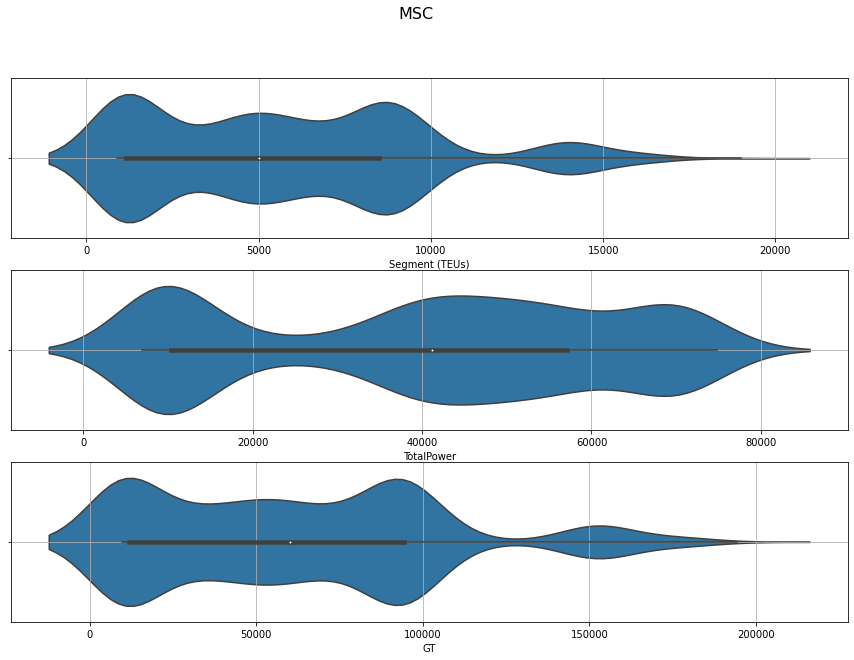

In [40]:
a = MSC_2018['Segment (TEUs)']
b = MSC_2018.TotalPower
c = MSC_2018.GT

violin(a,b,c)

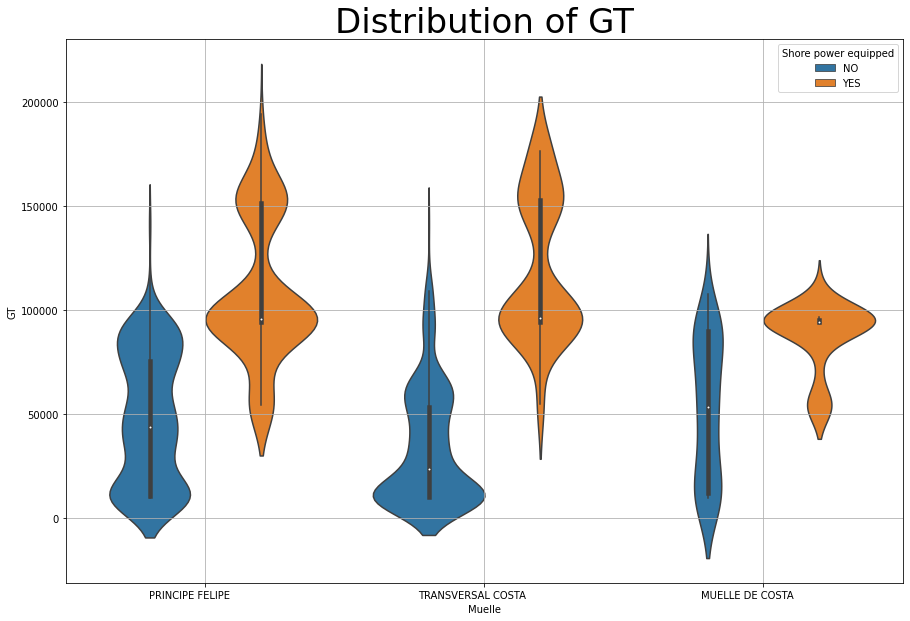

In [57]:
plt.figure(figsize=(15,10))
ax = sns.violinplot(x="Muelle", y="GT", hue="Shore power equipped", data=MSC_2018)#, split=True)
ax.set_title('Distribution of GT', fontsize=34)
ax.grid(True)

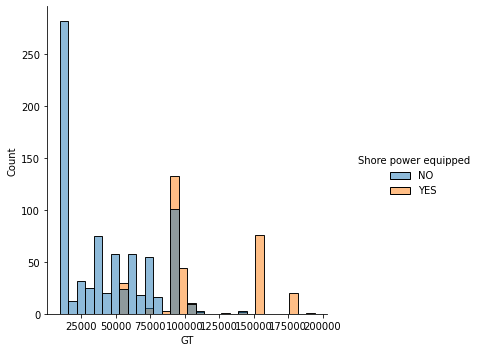

In [67]:
sns.displot(MSC_2018, x="GT", hue="Shore power equipped", bins = 30)

In [45]:
# Change YES* to YES

# MSC_2018['Shore power equipped'][MSC_2018['Shore power equipped']=='YES*']='YES'

2021-02-09 14:55:43,030 [12172] WARNING  py.warnings:110: [JupyterRequire] C:\Users\badria\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.



In [58]:
MSC_2018.Muelle.unique()

array(['PRINCIPE FELIPE          ', 'TRANSVERSAL COSTA        ',
       'MUELLE DE COSTA          '], dtype=object)

Text(0, 0.5, 'Potencia media')

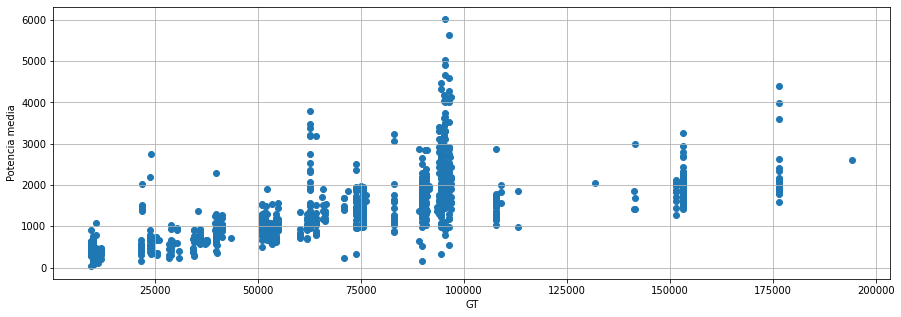

In [143]:
# pot = MSC2018_IHS['Average Power (OPS)']
# f_car = MSC2018_IHS['Factor_carga']
# gt = contenedores['Det. G.T. Buque']
# # teu = MSC2018_IHS['TEU']
# engine = contenedores['Potencia']
# m_engine = cont_ihs['Total KW Main Eng']

fig = figure(figsize=(15,5))
plt.scatter(MSC_2018.GT, MSC_2018.Potencia_kW)
plt.grid(True)
plt.xlabel('GT')
plt.ylabel('Potencia media')
# plt.ylim([0,100])

Text(0, 0.5, 'Potencia media escala')

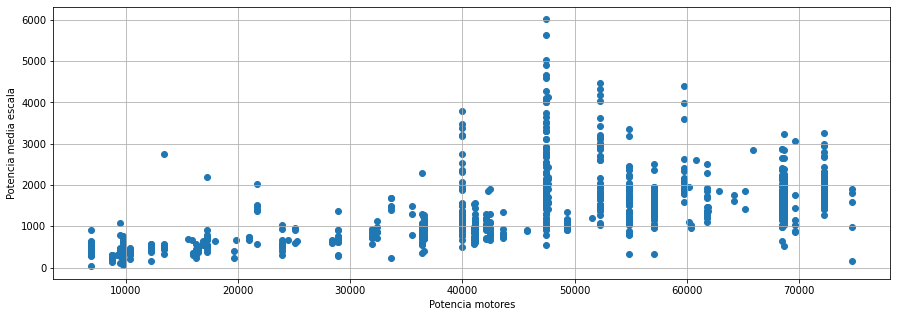

In [145]:
fig = figure(figsize=(15,5))
plt.scatter(MSC_2018.TotalPower, MSC_2018.Potencia_kW)
plt.grid(True)
plt.xlabel('Potencia motores')
plt.ylabel('Potencia media escala')
# plt.ylim([0,100])

Text(0, 0.5, 'Potencia media escala')

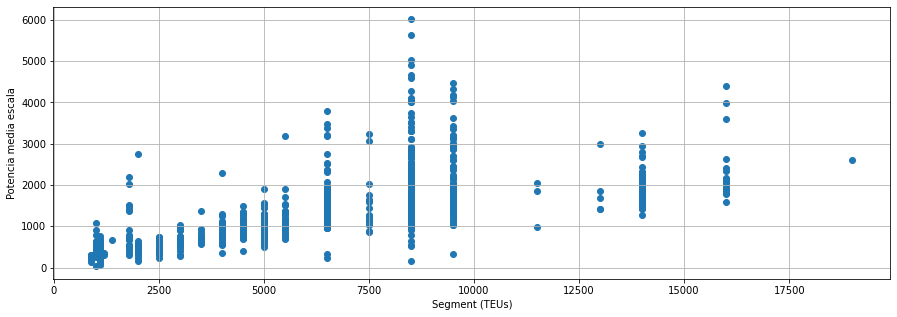

In [146]:
fig = figure(figsize=(15,5))
plt.scatter(MSC_2018['Segment (TEUs)'], MSC_2018.Potencia_kW)
plt.grid(True)
plt.xlabel('Segment (TEUs)')
plt.ylabel('Potencia media escala')

## Save

In [44]:
%store MSC_2018

Stored 'MSC_2018' (DataFrame)
